# Notes on multiclass data classification with Decision Tree


In this notebook we are going to create decision tree model by using Weather data.  
The aim of analysis here is to predict 'relative_humidity_3pm' from other features.

In this notebook, we will use Scikit-learn as well as reviewing basic operations of Pandas.

Decision Tree is one of supervised learning algorithms that is mostly used for classification problems.
Overview of 'Decision Tree' can be found here:
https://youtu.be/IpGxLWOIZy4?t=8m35s (~11:30) 

Importing Libraries


In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

Loading the data and creating a Pandas DataFrame from the CSV file

In [2]:
data = pd.read_csv('daily_weather.csv')

The file **daily_weather.csv** is a comma-separated file that contains weather data.  
This data comes from a weather station located in San Diego, California. 
The weather station has equipment of sensors that can capture weather-related measurements such as air temperature, air pressure, and relative humidity.  
Data were collected for a period of three years, from September 2011 to September 2014.

Let's check the overview of the data.

In [3]:
data

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.00,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471549,3.533324,0.00,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.00,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.00,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.90,14730.0,92.410000,76.740000
5,5,915.300000,78.404000,182.800000,9.932014,189.000000,10.983375,0.02,170.0,35.130000,33.930000
6,6,915.598868,70.043304,177.875407,3.745587,186.606696,4.589632,0.00,0.0,10.657422,21.385657
7,7,918.070000,51.710000,242.400000,2.527742,271.600000,3.646212,0.00,0.0,80.470000,74.920000
8,8,920.080000,80.582000,40.700000,4.518619,63.000000,5.883152,0.00,0.0,29.580000,24.030000
9,9,915.010000,47.498000,163.100000,4.943637,195.900000,6.576604,0.00,0.0,88.600000,68.050000


In [4]:
data.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

<br>Each row in daily_weather.csv captures weather data for a separate day.  <br><br>
Sensor measurements from the weather station were captured at one-minute intervals.  These measurements were then processed to generate values to describe daily weather. Since this dataset was created to classify low-humidity days vs. non-low-humidity days (that is, days with normal or high humidity), the variables included are weather measurements in the morning, with one measurement, namely relatively humidity, in the afternoon.  The idea is to use the morning weather values to predict whether the day will be low-humidity or not based on the afternoon measurement of relative humidity.

Each row, or sample, consists of the following variables:

number: unique number for each row
* **number: unique number for each row**
* **air_pressure_9am:** air pressure averaged over a period from 8:55am to 9:04am (*Unit: hectopascals*)
* **air_temp_9am:** air temperature averaged over a period from 8:55am to 9:04am (*Unit: degrees Fahrenheit*)
* **air_wind_direction_9am:** wind direction averaged over a period from 8:55am to 9:04am (*Unit: degrees, with 0 means coming from the North, and increasing clockwise*)
* **air_wind_speed_9am:** wind speed averaged over a period from 8:55am to 9:04am (*Unit: miles per hour*)
* **max_wind_direction_9am:** wind gust direction averaged over a period from 8:55am to 9:10am (*Unit: degrees, with 0 being North and increasing clockwise*)
* **max_wind_speed_9am:** wind gust speed averaged over a period from 8:55am to 9:04am (*Unit: miles per hour*)
* **rain_accumulation_9am:** amount of rain accumulated in the 24 hours prior to 9am (*Unit: millimeters*)
* **rain_duration_9am:** amount of time rain was recorded in the 24 hours prior to 9am (*Unit: seconds*)
* **relative_humidity_9am:** relative humidity averaged over a period from 8:55am to 9:04am (*Unit: percent*)
* **relative_humidity_3pm:** relative humidity averaged over a period from 2:55pm to 3:04pm (*Unit: percent *)


Let's check if there are any cells that contains null (invalid) value.

In [5]:
data[data.isnull().any(axis=1)]
data

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.00,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471549,3.533324,0.00,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.00,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.00,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.90,14730.0,92.410000,76.740000
5,5,915.300000,78.404000,182.800000,9.932014,189.000000,10.983375,0.02,170.0,35.130000,33.930000
6,6,915.598868,70.043304,177.875407,3.745587,186.606696,4.589632,0.00,0.0,10.657422,21.385657
7,7,918.070000,51.710000,242.400000,2.527742,271.600000,3.646212,0.00,0.0,80.470000,74.920000
8,8,920.080000,80.582000,40.700000,4.518619,63.000000,5.883152,0.00,0.0,29.580000,24.030000
9,9,915.010000,47.498000,163.100000,4.943637,195.900000,6.576604,0.00,0.0,88.600000,68.050000


# Data Cleaning

We will not use the column 'number'. Let's clean it.

When deleting a column in a DataFrame you we can use: del df['column_name']

In [6]:
del data['number']

In [7]:
data.head(3) #check the column 'number' was removed.

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,917.347688,71.403843,101.935179,2.443009,140.471549,3.533324,0.0,0.0,24.328697,19.426597
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000


Let's remove invalid values with pandas 'dropna' function.

In [8]:
before_rows = data.shape[0]   #df.shape[0] refers the number of rows
print(before_rows)

1095


In [9]:
data = data.dropna() #remove the rows with invalid values. 

In [10]:
after_rows = data.shape[0]
print(after_rows)

1064


How many rows was dropped by the cleaning process?

In [11]:
print(before_rows - after_rows)

31


# Binarizing data 
Binarize the 'relative_humidity_3pm' to the scale of 0 or 1

In [12]:
clean_data = data.copy() #it's a good practice to make a copy of data
clean_data['high_humidity_label'] = (clean_data['relative_humidity_3pm'] > 24.99)*1
# here, we define "'relative_humidity_3pm'] > 24.99 = 1" 

print(clean_data['high_humidity_label'])

0       1
1       0
2       0
3       0
4       1
5       1
6       0
7       1
8       0
9       1
10      1
11      1
12      1
13      1
14      0
15      0
17      0
18      1
19      0
20      0
21      1
22      0
23      1
24      0
25      1
26      1
27      1
28      1
29      1
30      1
       ..
1064    1
1065    1
1067    1
1068    1
1069    1
1070    1
1071    1
1072    0
1073    1
1074    1
1075    0
1076    0
1077    1
1078    0
1079    1
1080    0
1081    0
1082    1
1083    1
1084    1
1085    1
1086    1
1087    1
1088    1
1089    1
1090    1
1091    1
1092    1
1093    1
1094    0
Name: high_humidity_label, Length: 1064, dtype: int64


Basically, before splitting the data to train-test dataset, we would need to split the dataset into two: 
target value and predictor values. Let’s call the target value y and predictor values X.


y = relative_humidity_3pm (also called “target” data)

X = All other features

Store the target as 'y'.

In [13]:
y = clean_data[['high_humidity_label']].copy()

In [14]:
clean_data['relative_humidity_3pm'].head(3)

0    36.160000
1    19.426597
2    14.460000
Name: relative_humidity_3pm, dtype: float64

In [15]:
y.head(3)

,high_humidity_label
0,1
1,0
2,0


Use the weather data of 9am as features to predict humidity at 3pm

In [16]:
morning_features = ['air_pressure_9am','air_temp_9am','avg_wind_direction_9am','avg_wind_speed_9am',
        'max_wind_direction_9am','max_wind_speed_9am','rain_accumulation_9am', 'rain_duration_9am']

In [17]:
X = clean_data[morning_features].copy()

In [18]:
X.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am'],
      dtype='object')

In [19]:
y.columns

Index(['high_humidity_label'], dtype='object')

# Performing Test and Train split

To perform supervised learning we need two types of data sets:

one dataset (your "gold standard") which is called Training set 
and another dataset which is called Test set.


In machine learning, construction of algorithms that can learn from and make predictions on data is a common task.
To make an algorithm, machine tries to find patterns in the input data. This input is derived from training data.
Once a machine learned the underlying patterns of the training data and made an algorithm, it needs to be tested on fresh data (test data) that it has never used before, but which still belongs to the same distribution as the training data.


In the training phase, the learning algorithm uses the training data to adjust the model’s parameters to minimise errors.  At the end of the training phase, you get the trained model.

In the testing phase, the trained model is applied to test data. The model generated in the training phase is evaluated on how it performs on the test data.  The goal in building a (classifier) model which performs well on training as well as test data.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
X_train.describe()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,918.948546,65.201968,143.115108,5.338230,149.767629,6.833412,0.155216,244.723306
std,3.149144,11.349554,68.909384,4.371224,67.193114,5.411140,1.392919,1484.888666
min,907.990000,36.752000,18.400000,0.738190,37.400000,1.319795,0.000000,0.000000
25%,916.803255,57.366500,68.338184,2.245529,77.375000,3.130257,0.000000,0.000000
50%,919.058206,66.451202,166.206460,3.834055,174.250000,4.921268,0.000000,0.000000
75%,921.169054,73.823783,192.100000,6.808673,201.725000,8.410894,0.000000,0.000000
max,929.320000,98.906000,343.400000,23.554978,312.200000,29.840780,22.022000,17704.000000


In [22]:
y_train.describe()

,high_humidity_label
count,744.000000
mean,0.491935
std,0.500271
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


### Fit on Train Set

In [23]:
humidity_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
humidity_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [24]:
type(humidity_classifier)

sklearn.tree.tree.DecisionTreeClassifier

### Predict on Test Set 

In [25]:
predictions = humidity_classifier.predict(X_test)

In [26]:
predictions[:10] #pandas slicing function

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [27]:
y_test['high_humidity_label'][:10]

178     1
1013    1
704     1
533     1
882     0
712     1
254     1
1036    0
642     1
207     1
Name: high_humidity_label, dtype: int64

##### Calculate Accuracy of the Decision Tree classifier

In [28]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.809375

### Try the k-Nearest Neighbors classifier
to compared the accuracy score of classification, let's try another classification approach: 

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [30]:
predictions_knn = knn.predict(X_test)

In [31]:
predictions_knn[:10]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0])

In [32]:
accuracy_score(y_true = y_test, y_pred = predictions_knn)

0.778125

Compare the accuracy score of Decision Tree Classifier and Knn classifier.

Not bad...?

# Visualise the Decision Tree classifier

Here, we are going to visualise the Decision Tree classifier.

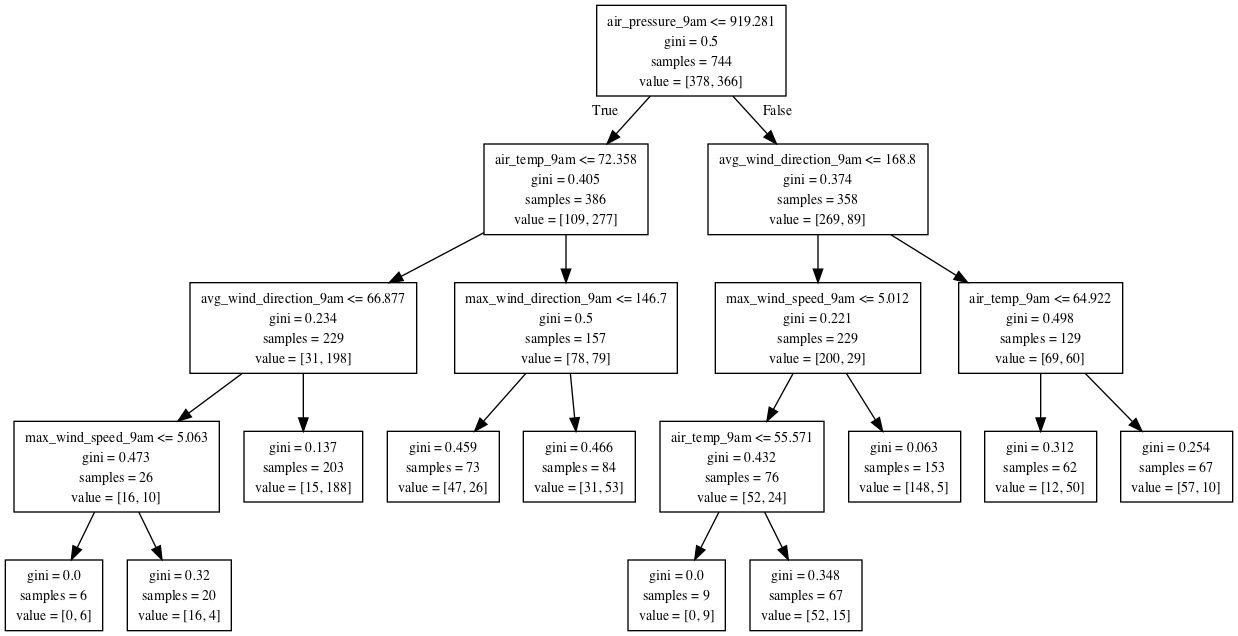

In [33]:
from sklearn import tree
from IPython.display import Image  
from sklearn.tree import export_graphviz #you might need to install GraphViz software.
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(humidity_classifier, out_file=None,
                               feature_names=morning_features)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

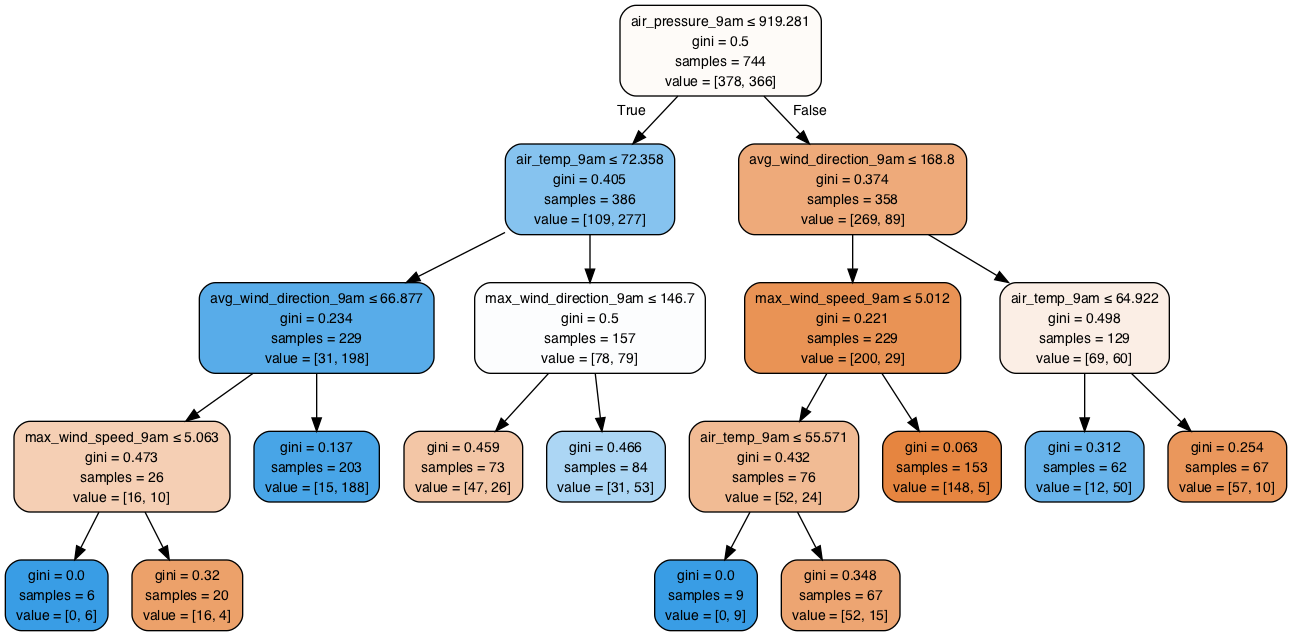

In [34]:
# another approach to visualise

from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(humidity_classifier, out_file=dot_data, 
                feature_names=morning_features,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())